<a href="https://colab.research.google.com/github/sudhav2024/Machine-Learning/blob/main/EX_NO_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

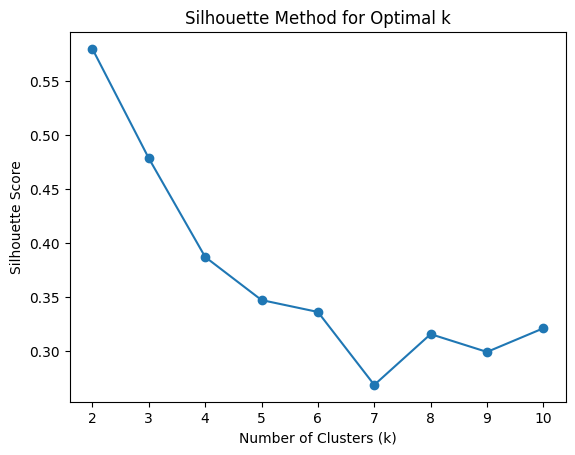

Best number of clusters (k): 2

Cluster Centers:
 [[ 0.50728948 -0.4211534   0.65243918  0.62756431]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]]

Cluster Sizes:
Cluster 0: 100 samples
Cluster 1: 50 samples

Mapping of clusters to true species:
species  setosa  versicolor  virginica
Cluster                               
0             0          50         50
1            50           0          0


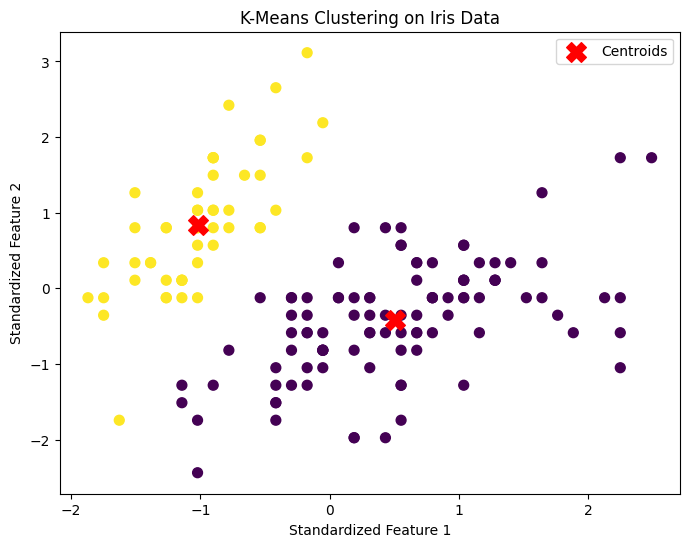


iris_frame.csv file created successfully!


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


data = pd.read_csv("iris.csv")

X = data.iloc[:, :-1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

range_n_clusters = range(2, 11)
silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    score = silhouette_score(X_std, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

best_k = range_n_clusters[np.argmax(silhouette_scores)]
print("Best number of clusters (k):", best_k)


kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_std)

labels = kmeans_final.labels_
centers = kmeans_final.cluster_centers_

print("\nCluster Centers:\n", centers)
(unique, counts) = np.unique(labels, return_counts=True)
print("\nCluster Sizes:")
for cluster_id, size in zip(unique, counts):
    print(f"Cluster {cluster_id}: {size} samples")

data["Cluster"] = labels
print("\nMapping of clusters to true species:")
print(pd.crosstab(data["Cluster"], data["species"]))


plt.figure(figsize=(8,6))
plt.scatter(X_std[:, 0], X_std[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering on Iris Data")
plt.xlabel("Standardized Feature 1")
plt.ylabel("Standardized Feature 2")
plt.legend()
plt.show()

data.to_csv("iris_frame.csv", index=False)
print("\niris_frame.csv file created successfully!")
